# gRPC interceptor benchmarking results analysis

In [86]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ../result.csv
data = pd.read_csv('../results_optimal.csv')
data_suboptimal = pd.read_csv('../results_suboptimal.csv')
data.columns

Index(['Timestamp', 'Total Requests', 'Concurrent Requests', 'Average Latency',
       'Max Latency', 'Min Latency', 'Avg. Throughput req/s', 'Time Elapsed'],
      dtype='object')

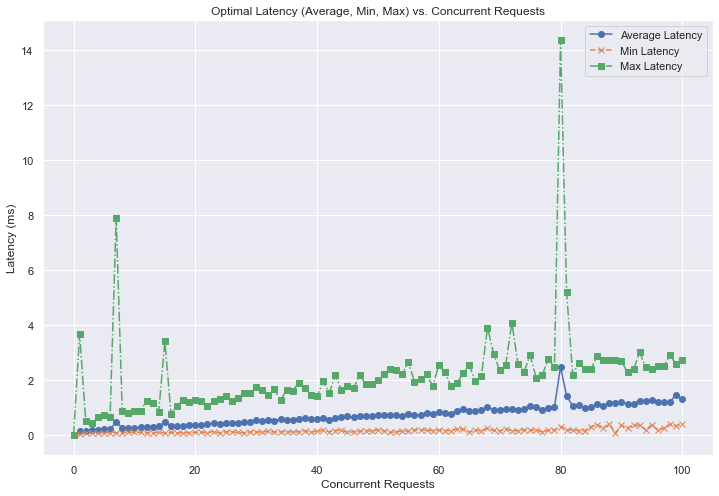

In [87]:
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data['Average Latency (ms)'] = data['Average Latency'].apply(convert_latency_to_ms)
data['Max Latency (ms)'] = data['Max Latency'].apply(convert_latency_to_ms)
data['Min Latency (ms)'] = data['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data['Concurrent Requests'], data['Average Latency (ms)'], marker='o', label='Average Latency')
plt.plot(data['Concurrent Requests'], data['Min Latency (ms)'], marker='x', linestyle='--', label='Min Latency')
plt.plot(data['Concurrent Requests'], data['Max Latency (ms)'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Optimal Latency (Average, Min, Max) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()




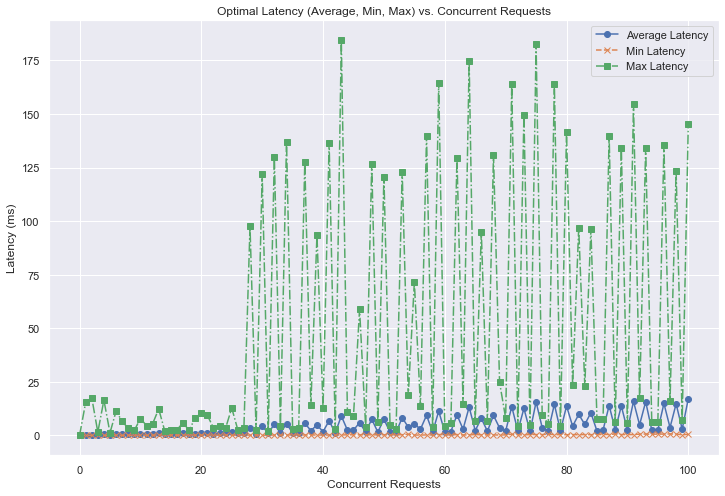

In [88]:
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data_suboptimal['Average Latency (ms)'] = data_suboptimal['Average Latency'].apply(convert_latency_to_ms)
data_suboptimal['Max Latency (ms)'] = data_suboptimal['Max Latency'].apply(convert_latency_to_ms)
data_suboptimal['Min Latency (ms)'] = data_suboptimal['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency (ms)'], marker='o', label='Average Latency')
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency (ms)'], marker='x', linestyle='--', label='Min Latency')
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Max Latency (ms)'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Optimal Latency (Average, Min, Max) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()




## Combine optimal and suboptimal in one plot

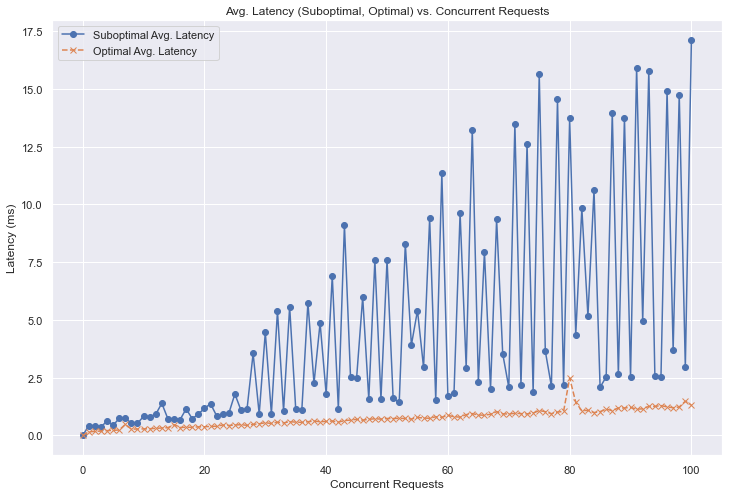

In [89]:
# Plotting Optimal and Suboptimal Average Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency (ms)'], marker='o', label='Suboptimal Avg. Latency')
plt.plot(data['Concurrent Requests'], data['Average Latency (ms)'], marker='x', linestyle='--', label='Optimal Avg. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()